In [1]:
import pandas as pd
sales_data = pd.read_csv('grouped sales data.csv')
trends_data_after_2015 = pd.read_csv('trends data after 2015.csv')
trends_data_before_2015 = pd.read_csv('trends data before 2015.csv')

In [2]:
trends_data_after_2015

,date,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay,isPartial
0,2015-03-01,18,9,27,9,False
1,2015-04-01,66,56,19,9,False
2,2015-05-01,35,53,35,9,False
3,2015-06-01,46,0,37,9,False
4,2015-07-01,44,26,44,18,False
...,...,...,...,...,...,...
80,2021-11-01,40,8,40,8,False
81,2021-12-01,25,0,16,8,False
82,2022-01-01,30,7,38,15,False
83,2022-02-01,35,0,35,9,False


In [3]:
trends_data_after_2015['date'] = pd.to_datetime(trends_data_after_2015['date'])
trends_data_after_2015['date'] = trends_data_after_2015['date'].dt.strftime('%Y-%m')

In [4]:
trends_data_after_2015

,date,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay,isPartial
0,2015-03,18,9,27,9,False
1,2015-04,66,56,19,9,False
2,2015-05,35,53,35,9,False
3,2015-06,46,0,37,9,False
4,2015-07,44,26,44,18,False
...,...,...,...,...,...,...
80,2021-11,40,8,40,8,False
81,2021-12,25,0,16,8,False
82,2022-01,30,7,38,15,False
83,2022-02,35,0,35,9,False


In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
grp_by_time = sales_data.groupby(['Delivery Date'])['Quantity in L'].sum().reset_index()
grp_by_time = grp_by_time.sort_values(by=['Delivery Date'])
grp_by_time

,Delivery Date,Quantity in L
0,2009-01,1678.000
1,2009-11,1100.000
2,2009-12,29086.000
3,2010-01,12607174.840
4,2010-02,17669239.516
...,...,...
138,2021-04,8912430.590
139,2021-05,838912.214
140,2021-06,127100.000
141,2021-07,4000.000


In [6]:
grp_by_time = grp_by_time.iloc[1: , :]
grp_by_time

,Delivery Date,Quantity in L
1,2009-11,1100.000
2,2009-12,29086.000
3,2010-01,12607174.840
4,2010-02,17669239.516
5,2010-03,19879116.681
...,...,...
138,2021-04,8912430.590
139,2021-05,838912.214
140,2021-06,127100.000
141,2021-07,4000.000


In [7]:
grp_by_time['Quantity in L'].describe()

count        142.000
mean    15671518.796
std      4996001.112
min         1000.000
25%     13102774.094
50%     15779500.388
75%     18681105.520
max     34404805.024
Name: Quantity in L, dtype: float64

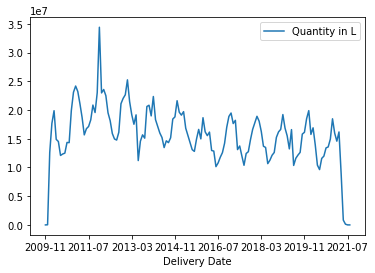

In [8]:
import matplotlib.pyplot as plt

grp_by_time.plot(x='Delivery Date', y='Quantity in L')
plt.show()

In [9]:
merged_data_after_2015 = pd.merge(grp_by_time, trends_data_after_2015, left_on='Delivery Date', right_on='date', how='inner')
merged_data_after_2015['date'] = pd.to_datetime(merged_data_after_2015['date'])
merged_data_after_2015

,Delivery Date,Quantity in L,date,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay,isPartial
0,2015-03,19716559.513,2015-03-01,18,9,27,9,False
1,2015-04,16832107.994,2015-04-01,66,56,19,9,False
2,2015-05,15612949.683,2015-05-01,35,53,35,9,False
3,2015-06,14335229.654,2015-06-01,46,0,37,9,False
4,2015-07,13099567.003,2015-07-01,44,26,44,18,False
...,...,...,...,...,...,...,...,...
73,2021-04,8912430.590,2021-04-01,39,0,8,24,False
74,2021-05,838912.214,2021-05-01,52,0,23,22,False
75,2021-06,127100.000,2021-06-01,0,0,30,15,False
76,2021-07,4000.000,2021-07-01,14,0,36,22,False


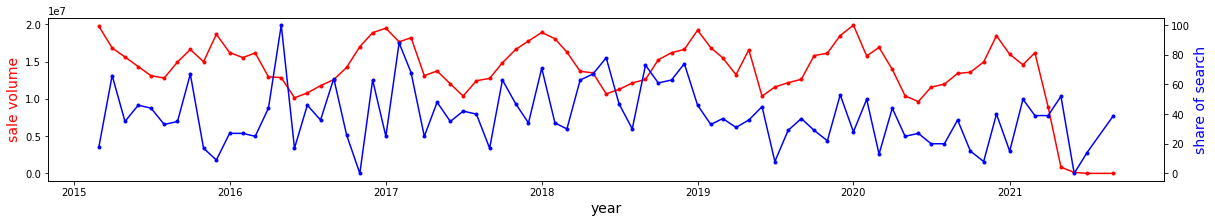

In [16]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(merged_data_after_2015['date'], merged_data_after_2015['Quantity in L'], color="red", marker=".")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("sale volume",color="red",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(merged_data_after_2015['date'], merged_data_after_2015['Ixom'],color="blue",marker=".")
ax2.set_ylabel("share of search",color="blue",fontsize=14)
plt.rcParams["figure.figsize"] = (40,3)
plt.show()